In [3]:
#IMPORTING ALL LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#IMPORTING DATA INTO PYTHON ENVIRONMENT
df=pd.read_csv("Comcast_telecom_complaints_data.csv")

In [3]:
# Check values of data 
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
# Check for null values if any
df.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [5]:
# Check data types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [6]:
# Converting "Date" column to datetime object
df['Date']=pd.to_datetime(df['Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Date_month_year              2224 non-null   object        
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
m

In [8]:
# Creating new column for "Month" name
df['Month']= df['Date'].dt.month_name()

#Checking values in newly created column "Month"
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,April
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,May
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May


,Date,count
84,2015-06-24,218
83,2015-06-23,190
85,2015-06-25,98
86,2015-06-26,55
90,2015-06-30,53
...,...,...
46,2015-05-17,7
41,2015-05-12,7
4,2015-04-05,6
10,2015-04-11,5


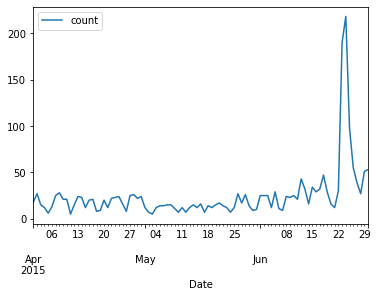

In [9]:
# Check maximum number of complaints are registered on a certain date
GroupByDates=df.groupby('Date').size()

# Create a dataframe showing total number of complaints on given date
TotalDailyComplaints=pd.DataFrame(GroupByDates).reset_index()

# Renaming columns for better understanding 
TotalDailyComplaints.rename(columns={0:'count'},inplace=True)

# Plotting a line graph to show trend chart for number of complaints on daily granularity level
TotalDailyComplaints.plot(x='Date',y='count',kind='line')

# Verifying that values shown in graph match the values in dataframe
TotalDailyComplaints.sort_values(['count'],ascending=False)

,Month,count
1,June,1280
0,April,545
2,May,399


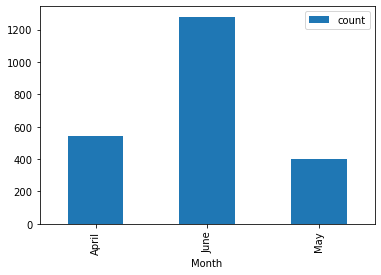

In [10]:
# Check maximum number of complaints are registered on a certain date
GroupByMonth = df.groupby('Month').size()

# Create a dataframe showing total number of complaints on given date
TotalMonthlyComplaints = pd.DataFrame(GroupByMonth).reset_index()

# Renaming columns for better understanding 
TotalMonthlyComplaints.rename(columns={0:'count'},inplace=True)

# Plotting a bar graph to show trend chart for number of complaints on monthly granularity level
TotalMonthlyComplaints.plot(x='Month',y='count',kind='bar')

# Verifying that values shown in graph match the values in dataframe
TotalMonthlyComplaints.sort_values(['count'],ascending=False)


In [11]:
# Find which complaint types are maximum
df['Customer Complaint'].value_counts()

# Isolated that similar complaint-types are split into different categories based on upper/lower case characters
# Eg: 'Comcast' and 'comcast' are not considered as same complaint type
# Converting all complaint types to uppercase for accurate results
df['Customer Complaint'].str.upper().value_counts()

COMCAST                                                            102
COMCAST DATA CAP                                                    30
COMCAST INTERNET                                                    29
COMCAST DATA CAPS                                                   21
COMCAST BILLING                                                     18
                                                                  ... 
MONTHLY DATA CAPS                                                    1
COMCAST/XFINITY POOR SERVICE, FRAUDULENT BILLING AND COLLECTION      1
LOST EMAILS/BILLING                                                  1
IMPROPER BILLING AND NON RESOLUTION OF ISSUES                        1
COMCAST, YPSILANTI MI INTERNET SPEED                                 1
Name: Customer Complaint, Length: 1740, dtype: int64

In [12]:
#### Create a new categorical variable with value as Open and Closed. 

# Find all unique values in 'Status' column
df['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [6]:
#### Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

df['New_Status']=['Open'  if x=='Open' or x=='Pending'  else 'Closed'  for x in df['Status'] ]

# check values of the newly created column "New_Status"
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,New_Status
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Open
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,Closed


In [8]:
# Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3.

# Creating a new dataframe to plot a stacked bar chart of state wise status of complaints 
# Grouping the dataframe on the basis on columns : State and New_Status
# Unstacking the dataset 
# Replacing "Nan" values with 0

TotalComplaintsInState = df.groupby(['State','New_Status']).size().unstack().fillna(0)


In [9]:
# Displaying the values in newly created dataframe
TotalComplaintsInState

New_Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


<AxesSubplot:xlabel='State'>

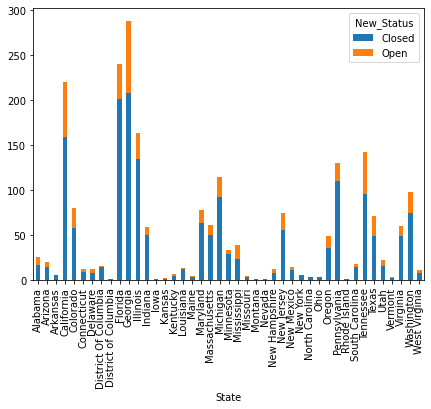

In [12]:
# Plotting a stacked bar graph to visualise the results 
TotalComplaintsInState.plot.bar(stacked=True,figsize=(7,5))

In [21]:
#### Provide insights on: Which state has the maximum complaints

# Finding top 5 states with maximum complaints 
df.groupby('State').size().sort_values(ascending=False)[:5]

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
dtype: int64

In [22]:
# Storing this data to a csv file 
df.to_csv("ProjectFile3.csv")

In [13]:
#### Provide insights on: Which state has the highest percentage of unresolved complaints

# Finding unresolved complaints from Total Complaints 
UnresolvedComplaints = TotalComplaintsInState.sort_values(by='Open',ascending=False)

# Adding a new column showing percentage of unresolved complaints in each state
# Formula : ( No. of complaints in a state / Sum of complaints in all states ) * 100

UnresolvedComplaints['PercentUnresolvedComplaints'] = UnresolvedComplaints['Open']/UnresolvedComplaints['Open'].sum()*100

# Checking values of newly created column "PercentUnresolvedComplaints"
UnresolvedComplaints.head()

New_Status,Closed,Open,PercentUnresolvedComplaints
State,,,
Georgia,208.0,80.0,15.473888
California,159.0,61.0,11.798839
Tennessee,96.0,47.0,9.090909
Florida,201.0,39.0,7.543520
Illinois,135.0,29.0,5.609284


In [24]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,New_Status
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,Closed
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,April,Closed
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,May,Open
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May,Closed


In [25]:
#### Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

# Creating a dataframe showing resolved complaints based on different methods of receiving.
Resolved_Complaints_DF = df.groupby(['Received Via','New_Status']).size().unstack()

print(Resolved_Complaints_DF)

New_Status          Closed  Open
Received Via                    
Customer Care Call     864   255
Internet               843   262


In [26]:
# Adding a new column showing percentage of complaints resolved till date
# Formula : ( No. of complaints resolved / Sum of all complaints resolved ) * 100
Resolved_Complaints_DF['ResolvedPct']=Resolved_Complaints_DF['Closed']/Resolved_Complaints_DF['Closed'].sum()*100

print(Resolved_Complaints_DF['ResolvedPct'])


Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: ResolvedPct, dtype: float64
